# Introduction to Machine Learning

The first cells are already filled in. They import packages, load the data, and include functions for data visualization. 

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import style; style.use('ggplot')

In [2]:
# Load data
data = pd.read_csv('exam-scores.csv')
data.head()

,Exam1,Exam2,Admitted
0,35,78,0
1,30,44,0
2,36,73,0
3,60,86,1
4,79,75,1


In [3]:
# Set up features and labels
X = data.values[:, [0, 1]]
y = data.values[:, -1]
m = y.size

In [4]:
def plot_data():
    """ Plots original data (admitted: green, denied: red) """
    plt.rcParams['figure.figsize'] = [6, 5]
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlGn')
    plt.title('Exam Scores vs Admittance')
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')
    plt.show()
    return None

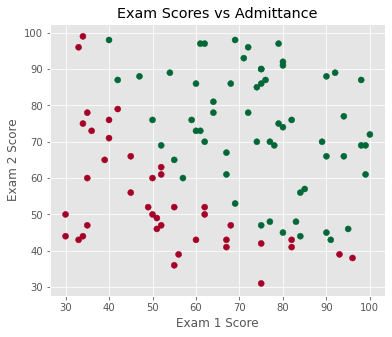

In [5]:
plot_data()

In [6]:
def decision_boundary(clf):
    """ Plots decision boundary given a classifier with original data overlaid """
    plt.rcParams['figure.figsize'] = [6, 5]
    plt.xlim(min(X[:, 0]) - 5, max(X[:, 0]) + 5)
    plt.ylim(min(X[:, 1]) - 5, max(X[:, 1]) + 5)
    X1, X2 = np.meshgrid(np.arange(start=min(X[:, 0]), stop=max(X[:, 0]), step=0.5),
                         np.arange(start=min(X[:, 1]), stop=max(X[:, 1]), step=0.5))
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('lightpink', 'lightgreen')))
    plot_data()
    return None

## Your turn! Fit some classifiers and test them out
In every cell, you should:
- Import the classifier from sklearn
- Create an instance of the classifier
- Fit the classifier
- Make predictions with the decision boundary function

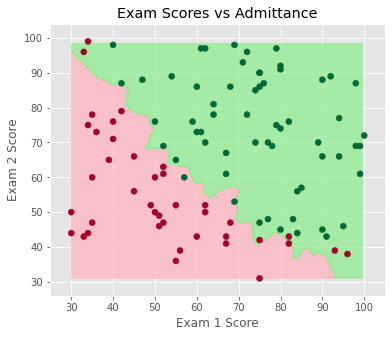

In [11]:
# K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
decision_boundary(knn)

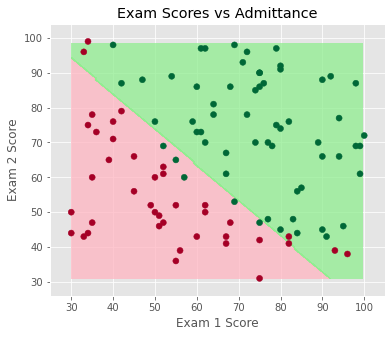

In [12]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)
decision_boundary(log_reg)

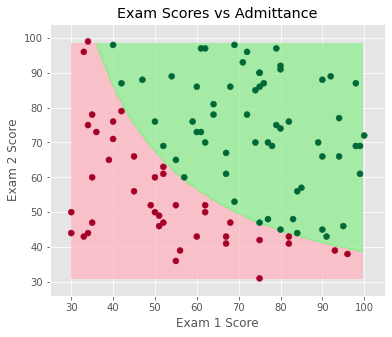

In [16]:
# SVM
from sklearn.svm import SVC
svm = SVC(kernel='poly', degree=2)
svm.fit(X, y)
decision_boundary(svm)

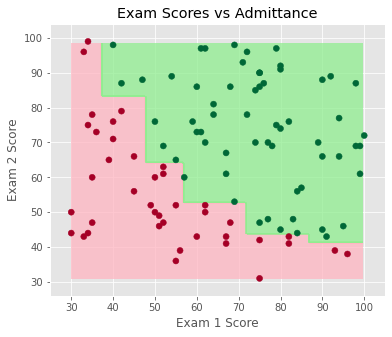

In [30]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=None)
tree.fit(X, y)
decision_boundary(tree)

The next cell will not run unless the GraphViz package is installed. This may not come with the base version of anaconda. After the workshop, you can install GraphViz using the following command in terminal:
```console
conda install -c anaconda python-graphviz 
```
If the following cell does not run, just follow along on screen!

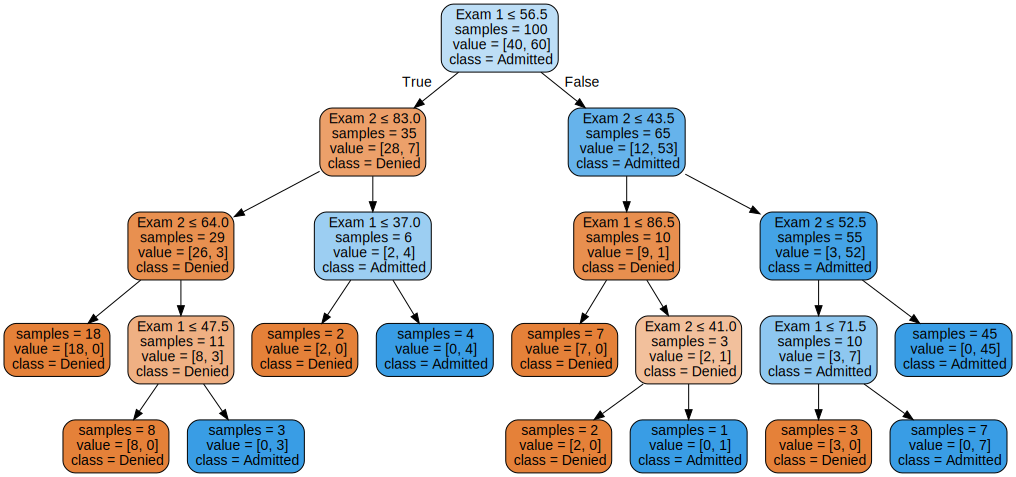

In [31]:
# To see tree diagram
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=['Exam 1', 'Exam 2'], 
                           class_names=['Denied', 'Admitted'],
                           filled=True, rounded=True, special_characters=True,
                           impurity=False, precision=1) 
graphviz.Source(dot_data)

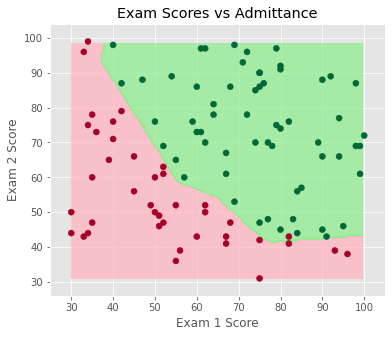

In [45]:
# Neural network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=25, max_iter=10000)
nn.fit(X, y)
decision_boundary(nn)

## Feedback

Please let me know how I can make this workshop better!

**Feedback form: https://forms.gle/68LZD6hnWLf8gkjK6**